## Introducción

Entrenamiento de modelo preentrenado para resolver el problema de predecir el ángulo del auto en base a la imagen.

Fuertemente basado en:
- https://towardsdatascience.com/a-practical-example-in-transfer-learning-with-pytorch-846bb835f2db
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html 

## Imports

In [1]:
import torch
import dataset_modules.image_preloader as image_preloader
import main
import importlib
import dataset_modules.preloaded_one_part_dataset as popd

importlib.reload(main)
importlib.reload(popd)

<module 'dataset_modules.preloaded_one_part_dataset' from '/clusteruy/home/franco.cuevas/tesis-jupyters-2/dataset_modules/preloaded_one_part_dataset.py'>

## Variables

In [2]:
FEATURE_EXTRACTION = False

device_string = "cuda" if torch.cuda.is_available() else "cpu"
device = torch.device(device_string)

if device_string == "cuda":
    print("Usando GPU!")

Usando GPU!


In [3]:
# preload images
preloaded_images = image_preloader.preload_images(
        images_folder='./dataset_modules/imgs/', 
        state_file='./dataset_modules/state.json', 
        resize_to=224
)

Started to preload images...
Image preloading complete in 1m 20s
The preloaded images use 0.07039642333984375MB of memory


----- CLASS DISTRIBUTION -----
Class: no_paragolpe_delantero, #916, 55.02%
Class: paragolpe_delantero_sano, #475, 28.53%
Class: paragolpe_delantero_roto, #274, 16.46%
#TRAIN 1332 #TEST 333
Epoch 0/39
----------
train Loss: 0.9473 Main metric (macro_f1): 0.2930 Time: 10.20s
test Loss: 0.8058 Main metric (macro_f1): 0.4364 Time: 1.05s
Epoch 1/39
----------
train Loss: 0.8015 Main metric (macro_f1): 0.4331 Time: 9.22s
test Loss: 0.6650 Main metric (macro_f1): 0.5127 Time: 1.04s
ES Module Best: 0.6649516101356026, BadEpochs: 0
Epoch 2/39
----------
train Loss: 0.6795 Main metric (macro_f1): 0.5076 Time: 9.22s
test Loss: 0.5636 Main metric (macro_f1): 0.6200 Time: 0.95s
ES Module Best: 0.5635540157825023, BadEpochs: 0
Epoch 3/39
----------
train Loss: 0.5777 Main metric (macro_f1): 0.5606 Time: 9.26s
test Loss: 0.4831 Main metric (macro_f1): 0.6676 Time: 0.95s
ES Module Best: 0.4831289925553777, BadEpochs: 0
Epoch 4/39
----------
train Loss: 0.4944 Main metric (macro_f1): 0.6270 Time: 9.25s

,class,precision,recall,f1
0,paragolpe_delantero_roto,0.680851,0.666667,0.673684
1,paragolpe_delantero_sano,0.835165,0.853933,0.844444
2,no_paragolpe_delantero,0.989744,0.984694,0.987212


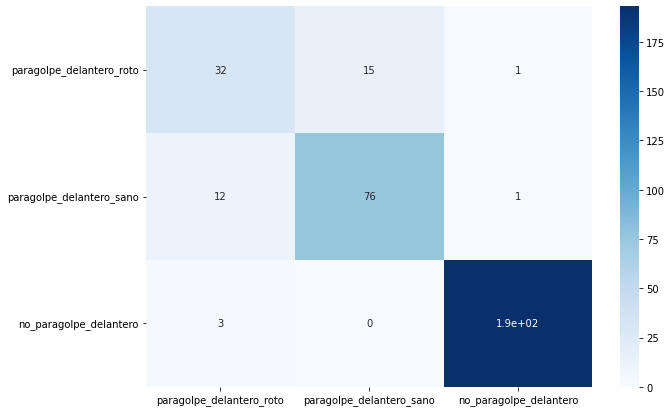

In [8]:
part = "Paragolpe Delantero"
MODEL_NAME = "one_part_model"
EXPERIMENT_NAME = "resnet50_finetuning-paragolpedel-new-final-visibility"

main.train_one_part_model(
    part, 
    preloaded_images, 
    MODEL_NAME, 
    EXPERIMENT_NAME, 
    device, 
    feature_extraction=False,
    train_ratio=0.8,
    random_state=42,
    num_epochs=40,
    visibility_file="./dataset_modules/analisis_manual_paragolpe.csv"
)